In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv

--2021-11-26 08:02:48--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv.1’

flawed_iris.csv.1   100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-11-26 08:02:48 (34.8 MB/s) - ‘flawed_iris.csv.1’ saved [2782/2782]



In [3]:
df = pd.read_csv("flawed_iris.csv")
df

,septal_length,septal_width,petal_length,petal_width,color,class
0,6.4,2.8,5.6,2.2,light,2.0
1,5.0,2.3,3.3,1.0,medium,1.0
2,4.9,2.5,4.5,1.7,medium,2.0
3,4.9,3.1,1.5,0.1,dark,0.0
4,5.7,3.8,1.7,0.3,dark,0.0
...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,light,1.0
116,5.7,3,NaN,1.2,light,1.0
117,4.4,2.9,1.4,0.2,light,0.0
118,4.8,3,1.4,0.1,dark,0.0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB
None


# NULL 확인하기

In [5]:
df.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            3
class            1
dtype: int64

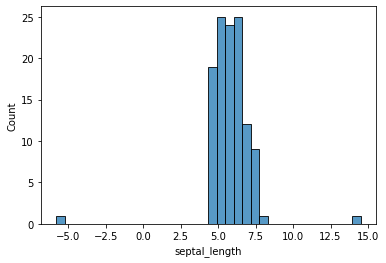

In [6]:
sns.histplot(data=df, x="septal_length")

In [7]:
septal_length_min = df.loc[(df.septal_length>=2.5) & (df.septal_length<10), "septal_length"].min()
septal_length_max = df.loc[(df.septal_length>=2.5) & (df.septal_length<10), "septal_length"].max()

In [8]:
df.loc[(df.septal_length<2.5),"septal_length"] = septal_length_min
df.loc[(df.septal_length>10),"septal_length"] = septal_length_max

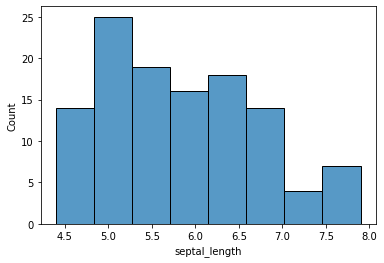

In [9]:
sns.histplot(data=df, x="septal_length")

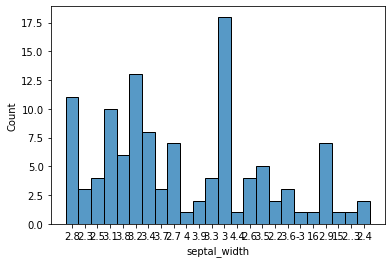

In [10]:
sns.histplot(data=df, x="septal_width")

In [11]:
df.loc[df.septal_width=="2..3","septal_width"] = "2.3"

In [12]:
df["septal_width"] = df["septal_width"].astype(float)

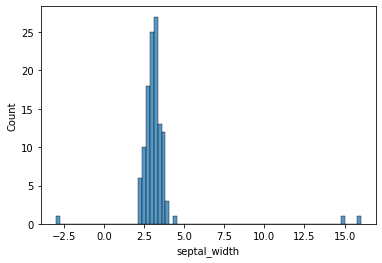

In [13]:
sns.histplot(data=df, x="septal_width")

In [14]:
septal_width_max = df.loc[(df.septal_width>=0) & (df.septal_width<=7.5), "septal_length"].max()
septal_width_min = df.loc[(df.septal_width>=0) & (df.septal_width<=7.5), "septal_length"].min()

In [15]:
df.loc[(df.septal_width)<0,"septal_length"] = septal_width_min
df.loc[(df.septal_width)>7.5,"septal_length"] = septal_width_max

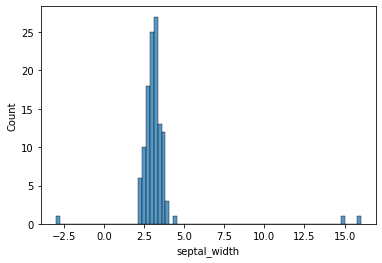

In [16]:
sns.histplot(data=df, x="septal_width")

In [17]:
df['class'].value_counts()

0.0    42
1.0    40
2.0    37
Name: class, dtype: int64

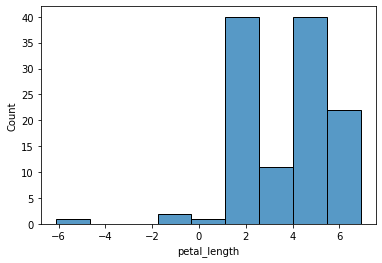

In [18]:
sns.histplot(data=df, x="petal_length")

In [19]:
petal_length_max = df.loc[(df.petal_length>=0) & (df.petal_length<10), "petal_length"].max()
petal_length_min = df.loc[(df.petal_length>=0) & (df.petal_length<10), "petal_length"].min()

In [20]:
df.loc[(df.petal_length<0), "petal_length"] = petal_length_min
df.loc[(df.petal_length>10), "petal_length"] = petal_length_max

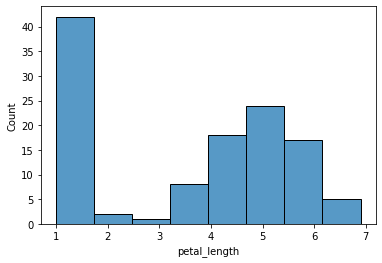

In [21]:
sns.histplot(data=df, x="petal_length")

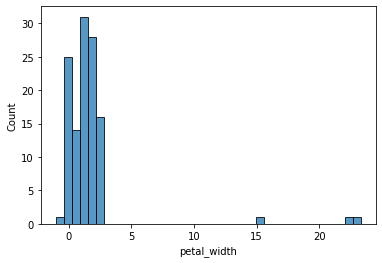

In [22]:
sns.histplot(data=df, x="petal_width")

In [23]:
petal_width_max = df.loc[(df.petal_width>=0) & (df.petal_width<5), "petal_width"].max()
petal_width_min = df.loc[(df.petal_width>=0) & (df.petal_width<5), "petal_width"].min()

In [24]:
df.loc[(df.petal_width<0), "petal_width"] = petal_width_min
df.loc[(df.petal_width>5), "petal_width"] = petal_width_max

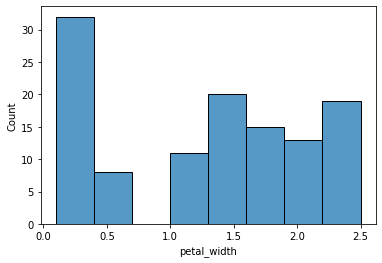

In [25]:
sns.histplot(data=df, x="petal_width")

In [32]:
df['class'].value_counts()

0.0    42
1.0    40
2.0    37
Name: class, dtype: int64

In [33]:
df.loc[df['class'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class
79,6.4,2.3,1.9,2.0,NaN


In [31]:
df.drop(['color'], axis=1, inplace=True)

In [34]:
df = df.loc[~df['class'].isnull()]

In [35]:
df.loc[df['class'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class


In [36]:
df.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
class            0
dtype: int64

In [37]:
df.loc[df['septal_length'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class
49,NaN,3.2,6.0,1.8,2.0
62,NaN,2.5,5.0,1.9,2.0
93,NaN,3.1,1.5,0.2,0.0


In [38]:
df.loc[df['septal_length'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class
49,NaN,3.2,6.0,1.8,2.0
62,NaN,2.5,5.0,1.9,2.0
93,NaN,3.1,1.5,0.2,0.0


In [39]:
df.loc[df['septal_width'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class
34,6.2,NaN,4.8,1.8,2.0
76,5.5,NaN,3.8,1.1,1.0


In [40]:
df.loc[df['petal_length'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class
17,7.6,3.0,NaN,2.0,1.0
91,6.1,2.8,NaN,1.2,1.0
116,5.7,3.0,NaN,1.2,1.0


In [41]:
df.loc[df['petal_width'].isnull()]

,septal_length,septal_width,petal_length,petal_width,class
64,6.2,2.2,4.5,NaN,1.0
107,5.0,3.6,1.4,NaN,0.0


In [42]:
df = df.loc[~df['septal_length'].isnull()]

In [47]:
df = df.loc[~df['septal_width'].isnull()]

In [44]:
df = df.loc[~df['petal_length'].isnull()]

In [45]:
df = df.loc[~df['petal_width'].isnull()]

In [48]:
df.isnull().sum()

septal_length    0
septal_width     0
petal_length     0
petal_width      0
class            0
dtype: int64

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  109 non-null    float64
 1   septal_width   109 non-null    float64
 2   petal_length   109 non-null    float64
 3   petal_width    109 non-null    float64
 4   class          109 non-null    float64
dtypes: float64(5)
memory usage: 5.1 KB
None


In [50]:
normalized_df = ( df - df.min() ) / ( df.max() - df.min())

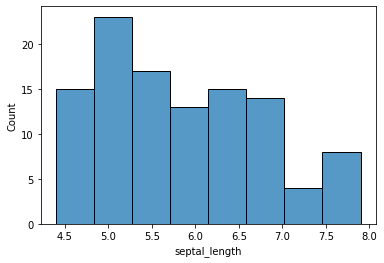

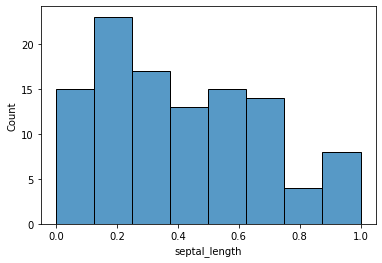

In [51]:
sns.histplot(df.septal_length)
plt.show()
sns.histplot(normalized_df.septal_length)
plt.show()

In [53]:
df.columns

Index(['septal_length', 'septal_width', 'petal_length', 'petal_width',
       'class'],
      dtype='object')

In [55]:
data_x = df.loc[:, ['septal_length', 'septal_width', 'petal_length', 'petal_width']]
data_y = df.loc[:, 'class' ]

In [56]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state=321)

In [57]:
train_x

,septal_length,septal_width,petal_length,petal_width
100,4.9,3.0,1.4,0.2
113,6.3,3.3,6.0,2.5
85,4.9,3.1,1.5,0.1
98,5.9,3.2,4.8,1.8
5,4.4,3.2,1.3,0.2
...,...,...,...,...
18,6.4,3.2,5.3,2.3
78,6.0,2.9,4.5,1.5
43,5.1,3.8,1.9,0.4
32,6.4,3.2,4.5,1.5


In [58]:
train_y

100    0.0
113    2.0
85     0.0
98     1.0
5      0.0
      ... 
18     2.0
78     1.0
43     0.0
32     1.0
27     2.0
Name: class, Length: 73, dtype: float64

In [59]:
test_y

75     0.0
23     2.0
8      1.0
56     2.0
6      0.0
65     2.0
47     2.0
48     0.0
89     0.0
37     2.0
38     0.0
73     2.0
54     1.0
72     0.0
60     1.0
74     2.0
114    0.0
51     1.0
46     0.0
105    0.0
15     1.0
108    1.0
21     1.0
24     2.0
83     1.0
33     1.0
86     1.0
59     1.0
63     2.0
71     1.0
109    0.0
26     1.0
44     0.0
104    0.0
29     1.0
110    2.0
Name: class, dtype: float64

In [60]:
from sklearn.linear_model import LogisticRegression #Logistic(Regression)Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayesian
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosing
from sklearn.neural_network import MLPClassifier #Neural Network

In [61]:
#logistic (Regression) Classifier, Decision tree, support vector machine, naive bayesian, K Nearest Neighbor, Random Forest, Gradient Boosing, Neural Network
models = []
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("ANN", MLPClassifier()))

In [62]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(train_x, train_y.values.ravel())
    predicted_y = model.predict(test_x)
    print(name, "'s Accuracy is ", accuracy_score(test_y, predicted_y))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR 's Accuracy is  0.8611111111111112
DT 's Accuracy is  0.8055555555555556
SVM 's Accuracy is  0.8611111111111112
NB 's Accuracy is  0.8333333333333334
KNN 's Accuracy is  0.8611111111111112
RF 's Accuracy is  0.7777777777777778
GB 's Accuracy is  0.7777777777777778
ANN 's Accuracy is  0.8611111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
